# Defi-IA 2022 <a href="https://www.kaggle.com/c/defi-ia-2022/overview"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" style="max-width: 70px; display: inline" alt="Python"/></a>
-------------------------------------------------------------

**Predict the accumulated daily rainfall on ground stations**  
*Quentin Douzery, Alexia Ghozland, Dario Moed*

## <font color = 'royalblue'>1 Imports</font>

### 1.1 Packages

In [1]:
##Packages
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.preprocessing import scale , StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.models import Sequential

from tqdm import tqdm

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

### 1.2 Data

In [3]:
##Données
#coords_path = 'C:/Users/Alexia/Desktop/Other/stations_coordinates.csv' #Perso
#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'

#xtrainS_path = 'C:/Users/Alexia/Desktop/Data/Train/X_station_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'

#ytrain_path = 'C:/Users/Alexia/Desktop/Data/Train/Y_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'

#xtestS_path = 'C:/Users/Alexia/Desktop/Data/Test/X_station_test.csv' #Perso

#bl_obsT_path = 'C:/Users/Alexia/Desktop/Data/Test/Baselines/Baseline_observation_test.csv' #Perso

In [3]:
# ##Données
#coords_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Other/stations_coordinates.csv' #Perso
coords_path = '/home/douzery/Bureau/Defi-IA_Data/Other/stations_coordinates.csv' #INSA

#xtrainS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/X_station_train.csv' #Perso
xtrainS_path = '/home/douzery/Bureau/Defi-IA_Data/Train/X_station_train.csv' #INSA

#ytrain_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Y_train.csv' #Perso
ytrain_path = '/home/douzery/Bureau/Defi-IA_Data/Train/Y_train.csv' #INSA

#xtestS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/X_station_test.csv' #Perso
xtestS_path = '/home/douzery/Bureau/Defi-IA_Data/Test/X_station_test.csv' #INSA

#bl_obsT_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #Perso
bl_obsT_path = '/home/douzery/Bureau/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #INSA

## <font color = 'royalblue'>2 Récupération des données</font>

In [4]:
def Get_NumberSta (id):
    return int(id.split('_')[0])

### 2.1 Coordonnées des stations

In [5]:
##Coords
coords = pd.read_csv(coords_path)
display(coords)
print('Missing Data :', coords.isna().sum().sum(), '\n', 'Shape is :', coords.shape)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


Missing Data : 0 
 Shape is : (325, 4)


### 2.2 X_train

In [6]:
##X_train
xtrainS = pd.read_csv(xtrainS_path,parse_dates=['date'],infer_datetime_format=True)
xtrainS['number_sta'] = xtrainS['number_sta'].astype('category')  
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


Missing Data : 6899007 
 Shape is : (4409474, 9)


In [7]:
xtrainS = xtrainS.merge(coords, how='left', on='number_sta')
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0


Missing Data : 6899007 
 Shape is : (4409474, 12)


### 2.3 Y_train

In [8]:
#Y_train
ytrain = pd.read_csv(ytrain_path, parse_dates=['date'], infer_datetime_format=True)
ytrain['number_sta'] = ytrain['number_sta'].astype('category')
display(ytrain)
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


Missing Data : 21640 
 Shape is : (183747, 4)


### 2.4 X_test

In [9]:
##X_test
xtestS = pd.read_csv(xtestS_path,infer_datetime_format=True)
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


Missing Data : 3914287 
 Shape is : (2304802, 8)


In [10]:
#Create 'number_sta' column
xtestS = xtestS.assign(number_sta=pd.Series(np.zeros(xtestS.shape[0])).values)
xtestS.loc[:,"number_sta"] = xtestS.loc[:,"Id"].apply(Get_NumberSta)

In [11]:
xtestS = xtestS.merge(coords, how='left', on='number_sta')
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id,number_sta,lat,lon,height_sta
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4,14047002,49.275,-0.712,60.0
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5,14047002,49.275,-0.712,60.0
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6,14047002,49.275,-0.712,60.0
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7,14047002,49.275,-0.712,60.0
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8,14047002,49.275,-0.712,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19,95690001,49.108,1.831,126.0
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20,95690001,49.108,1.831,126.0
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21,95690001,49.108,1.831,126.0
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22,95690001,49.108,1.831,126.0


Missing Data : 3914287 
 Shape is : (2304802, 12)


### 2.5 Baseline observations

In [12]:
bl_obsT = pd.read_csv(bl_obsT_path,infer_datetime_format=True)
Id_pred = bl_obsT["Id"]

## <font color = 'royalblue'>3 Pre-processing</font>

In [13]:
def Get_StationDay (id):
    return id.split('_')[0] + "_" + id.split('_')[1]

In [14]:
def Id_to_int (id):
    return int(id.split('_')[0] + id.split('_')[1] + id.split('_')[2])

### 3.1 Add 'month' variable

In [15]:
xtrainS['month'] = xtrainS['date'].dt.month
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta,month
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0,1
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0,1
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0,1
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0,12
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0,12
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0,12
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0,12


Missing Data : 6899007 
 Shape is : (4409474, 13)


### 3.2 Train data

In [16]:
def Preprocess_train (xtrain, ytrain):
    #Copy original df
    xtrain_p = xtrain.copy()
    ytrain_p = ytrain.copy()
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    ytrain_p.dropna(inplace=True)
    
#    #Fill Nans
#    xtrain_p = xtrain_p.fillna(method="backfill")
#    ytrain_p = ytrain_p.fillna(method="backfill")
    
    #Create 'StationDay' column
    xtrain_p = xtrain_p.assign(StationDay=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,"StationDay"] = xtrain_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless columns
    xtrain_p.drop(['number_sta', 'date', 'Id'], axis=1, inplace=True)
    ytrain_p.drop(['date', 'number_sta'], axis=1, inplace=True)
    
    #Mean on 24 hours (except 'precip')
    xtrain_p = xtrain_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    #xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month']] = xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month']].divide(24)
    xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
              'lat', 'lon', 'height_sta']] = xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                                                       'lat', 'lon', 'height_sta']].divide(24)
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    
    #Keep the same rows in X_train and Y_train
    xtrain_p = xtrain_p.loc[xtrain_p['StationDay'].isin(ytrain_p["Id"])]
    ytrain_p = ytrain_p.loc[ytrain_p['Id'].isin(xtrain_p["StationDay"])]
    
    #Reset index
    xtrain_p.reset_index(drop=True,inplace=True)
    ytrain_p.reset_index(drop=True,inplace=True)
    
    #Sort xtrain
    xtrain_p = xtrain_p.set_index('StationDay')
    xtrain_p = xtrain_p.reindex(index=ytrain_p['Id'])
    xtrain_p = xtrain_p.reset_index()
    
    #Drop useless variables
    #xtrain_p.drop(['Id'], axis=1, inplace=True)
    #ytrain_p.drop(['Id'], axis=1, inplace=True)
    
    return xtrain_p, ytrain_p

In [17]:
xtrainS_aux, ytrain_aux = Preprocess_train(xtrainS, ytrain)

### 3.3 Test data

In [39]:
def Preprocess_test (xtest, bl_obsT):
    #Copy original df
    xtest_p = xtest.copy()
    
    #Create 'IntId' column
    xtest_p = xtest_p.assign(IntId=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"IntId"] = xtest_p.loc[:,"Id"].apply(Id_to_int)
    
    #Sort xtest on 'IntId' values
    xtest_p = xtest_p.sort_values('IntId', ignore_index=True)
    
    #Fill NaNs
    xtest_p = xtest_p.fillna(method="backfill")
    
    #Create 'StationDay' column
    xtest_p = xtest_p.assign(StationDay=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"StationDay"] = xtest_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless variables
    xtest_p.drop(['Id', 'IntId', 'number_sta'], axis=1, inplace=True)

    #Mean on 24 hours (except 'precip')
    xtest_p = xtest_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    #xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month']] = xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month']].divide(24)
    xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month',
             'lat', 'lon', 'height_sta']] = xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                                                     'lat', 'lon', 'height_sta']].divide(24)
    
    #Remove NaNs
    xtest_p.dropna(inplace=True)
    
    #Keep the same rows in xtest and ytest
    xtest_p = xtest_p.loc[xtest_p['StationDay'].isin(bl_obsT["Id"])]

    #Reset index
    xtest_p.reset_index(drop=True, inplace=True)
    
    #Sort xtest
    xtest_p = xtest_p.set_index('StationDay')
    xtest_p = xtest_p.reindex(index=bl_obsT['Id'])
    xtest_p = xtest_p.reset_index()
    
    #Drop useless variables
    xtest_p.drop(['Id'], axis=1, inplace=True)
    
    #Rearrange columns order
    #xtest_p = xtest_p[['ff', 't', 'td', 'hu', 'dd', 'precip', 'month']]
    xtest_p = xtest_p[['ff', 't', 'td', 'hu', 'dd', 'precip', 'lat', 'lon', 'height_sta', 'month']]
    
    return xtest_p

In [40]:
xtestS_p = Preprocess_test(xtestS, bl_obsT)

## <font color = 'royalblue'>4 Exploration</font>

### 4.1 Train data

In [20]:
xtrainS_aux['month'].value_counts()

10.0    7231
12.0    7118
3.0     7081
8.0     7073
1.0     7004
11.0    7004
4.0     6949
7.0     6946
9.0     6661
6.0     6633
2.0     6306
5.0     6114
Name: month, dtype: int64

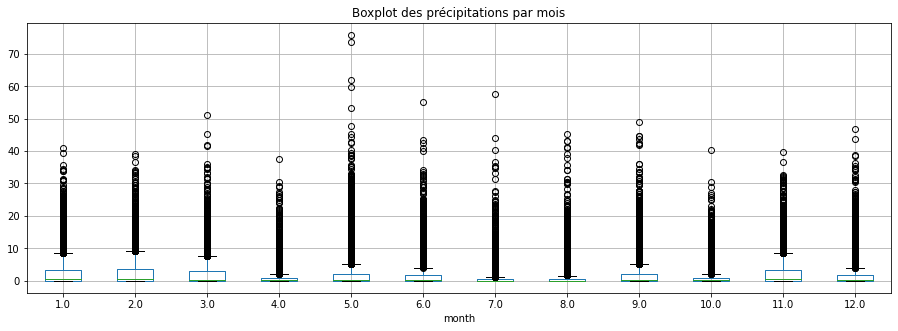

In [21]:
xtrainS_aux.boxplot(column=['precip'], by='month', figsize=(15,5))
plt.title("Boxplot des précipitations par mois")
plt.suptitle('')
plt.show()

### 4.2 Test data

In [22]:
xtestS_p['month'].value_counts()

12.0    7832
10.0    7511
11.0    7451
8.0     7377
7.0     7197
5.0     7133
3.0     7071
9.0     6978
6.0     6941
4.0     6882
1.0     6471
2.0     6296
Name: month, dtype: int64

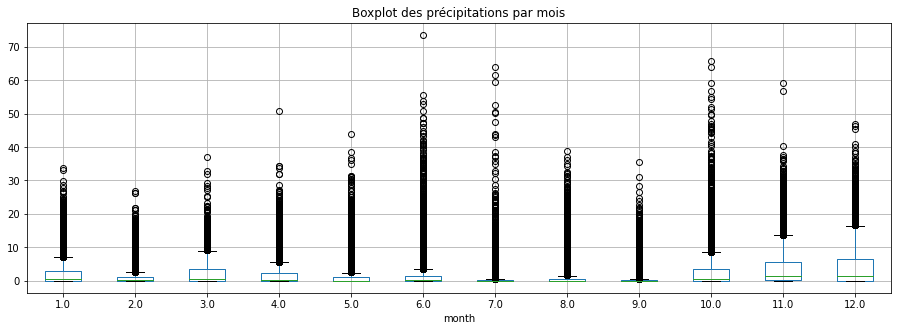

In [23]:
xtestS_p.boxplot(column=['precip'], by='month', figsize=(15,5))
plt.title("Boxplot des précipitations par mois")
plt.suptitle('')
plt.show()

1 : pareil  
2 : plus faible dans test  
3 : pareil  
4 : plus important dans test  
5 : pareil  
6 : pareil  
7 : pareil  
8 : pareil  
9 : plus faible dans test  
10 : plus important dans test  
11 : pareil  
12 : plus important dans test

**Gérer les outliers  
Utiliser la localisation pour créer des classes**

## <font color = 'royalblue'>5 Training</font>

### 5.1 Preparation

In [25]:
#max_precip = max(ytrain_aux['Ground_truth'])
#print(max_precip)

In [26]:
#xtrainS_aux = xtrainS_aux.loc[xtrainS_aux['precip'] < max_precip]
#xtrainS_aux.reset_index(drop=True, inplace=True)

In [27]:
#ytrain_aux = ytrain_aux.loc[ytrain_aux['Id'].isin(xtrainS_aux['Id'])]

In [28]:
#ytrain_p = ytrain_aux.copy()
#xtrainS_p = xtrainS_aux.copy()

**Xtrain & Ytrain**

In [26]:
#Remove high values of 'Ground_truth'
ytrain_p = ytrain_aux.loc[ytrain_aux['Ground_truth'] < 10]

In [27]:
##Keep the same rows in xtrain and ytrain
xtrainS_p = xtrainS_aux.loc[xtrainS_aux['Id'].isin(ytrain_p["Id"])]

In [28]:
to_drop = ['Id']

In [29]:
ytrain_p = ytrain_p.drop(to_drop, axis=1)
display(ytrain_p.head())
print('Missing Data :', ytrain_p.isna().sum().sum(), '\n', 'Shape is :', ytrain_p.shape)

,Ground_truth
0,3.4
1,4.0
3,3.6
9,2.6
10,1.4


Missing Data : 0 
 Shape is : (77604, 1)


In [30]:
xtrainS_p = xtrainS_p.drop(to_drop, axis=1)
display(xtrainS_p.head())
print('Missing Data :', xtrainS_p.isna().sum().sum(), '\n', 'Shape is :', xtrainS_p.shape)

,ff,t,td,hu,dd,precip,lat,lon,height_sta,month
0,3.913750,280.333750,278.514583,88.591667,146.500000,0.2,49.334,-0.431,2.0,1.0
1,4.759583,280.089583,278.888750,92.187500,158.666667,0.6,48.928,-0.149,155.0,1.0
3,4.868750,279.287500,278.418333,94.266667,167.625000,0.8,49.364,0.167,139.0,1.0
9,5.787917,279.865833,279.030833,94.608333,158.125000,1.6,48.266,-2.748,235.0,1.0
10,4.990000,280.023750,278.667500,91.500000,141.291667,0.4,48.519,-2.420,71.0,1.0


Missing Data : 0 
 Shape is : (77604, 10)


In [31]:
xtrainS_p.reset_index(drop=True, inplace=True)
ytrain_p.reset_index(drop=True, inplace=True)

**Xtrain**

In [32]:
#dummies for 'month'
xtrainSDum = pd.get_dummies(xtrainS_p['month'])
del xtrainSDum[1]
display(xtrainSDum)

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
77599,0,0,0,0,0,0,0,0,0,0,1
77600,0,0,0,0,0,0,0,0,0,0,1
77601,0,0,0,0,0,0,0,0,0,0,1
77602,0,0,0,0,0,0,0,0,0,0,1


**Xtest** 

In [41]:
#dummies for 'month'
xtestSDum = pd.get_dummies(xtestS_p['month'])
del xtestSDum[1]
display(xtestSDum)

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85135,0,0,0,0,0,0,0,0,0,0,1
85136,0,0,0,0,0,0,0,0,0,0,1
85137,0,0,0,0,0,0,0,0,0,0,1
85138,0,0,0,0,0,0,0,0,0,0,1


### 5.2 Metrics

In [34]:
def MAPE(ypred, ytrue):
    aux = abs((ytrue-ypred)/ytrue)
    return 100*aux.mean(axis=0)

### 5.3 Normalization

In [35]:
def normalization(x_train, x_test):
    #Calcul de la moyenne et de la variance de l'échantillon train
    mean = x_train.mean()
    std  = x_train.std()
    
    #Normalisation
    x_train = (x_train - mean) / std
    x_test  = (x_test  - mean) / std

    #Mise en forme
    #x_train = np.array(x_train)
    #x_test = np.array(x_test)
    return x_train, x_test

In [42]:
xtrainS_p_N, xtestS_p_N = normalization(xtrainS_p, xtestS_p)

**Xtrain**

In [37]:
#concatenation after normalization : dummies (month) + original df
xtrainS_p_N = xtrainS_p_N.drop(['month'], axis=1)
xtrainS_p_N = pd.concat([xtrainS_p_N, xtrainSDum],axis=1)
display(xtrainS_p_N)

,ff,t,td,hu,dd,precip,lat,lon,height_sta,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.227422,-0.795752,-0.561644,0.780644,-0.586335,-0.401632,1.140957,0.220885,-1.440274,0,0,0,0,0,0,0,0,0,0,0
1,0.670824,-0.838394,-0.487542,1.145120,-0.423308,-0.301487,0.736851,0.370843,0.740898,0,0,0,0,0,0,0,0,0,0,0
2,0.728051,-0.978471,-0.580706,1.355867,-0.303272,-0.251415,1.170817,0.538881,0.512801,0,0,0,0,0,0,0,0,0,0,0
3,1.209896,-0.877470,-0.459403,1.390498,-0.430567,-0.051126,0.077940,-1.011216,1.881380,0,0,0,0,0,0,0,0,0,0,0
4,0.791613,-0.849891,-0.531360,1.075435,-0.656123,-0.351559,0.329759,-0.836796,-0.456608,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77599,2.670940,0.218119,0.674411,1.065721,0.621288,1.025428,-1.586260,0.617050,0.284705,0,0,0,0,0,0,0,0,0,0,1
77600,0.287489,0.275096,0.622836,0.723206,0.414155,0.399524,-1.147317,0.502189,-0.100208,0,0,0,0,0,0,0,0,0,0,1
77601,1.295300,0.191777,0.528847,0.709269,0.657020,0.950319,-1.767411,0.897291,0.712386,0,0,0,0,0,0,0,0,0,0,1
77602,0.384032,0.098634,0.549312,1.093173,0.528609,0.950319,0.336727,1.509884,0.184913,0,0,0,0,0,0,0,0,0,0,1


**Xtest**

In [43]:
#concatenation after normalization : dummies (month) + original df  
xtestS_p_N = xtestS_p_N.drop(['month'], axis=1)
xtestS_p_N = pd.concat([xtestS_p_N, xtestSDum],axis=1)
display(xtestS_p_N)

,ff,t,td,hu,dd,precip,lat,lon,height_sta,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.921576,-0.487363,-0.444137,0.084210,0.460495,-0.101198,1.140957,0.220885,-1.440274,0,0,0,0,0,0,0,0,0,0,0
1,0.326805,-0.697589,-0.323164,1.155679,-0.363011,-0.201343,0.952839,0.472410,0.313217,0,0,0,0,0,0,0,0,0,0,0
2,1.083647,-0.650071,-0.570556,0.240897,0.377865,-0.351559,0.987675,0.207591,-0.513632,0,0,0,0,0,0,0,0,0,0,0
3,-0.426105,-0.713525,-0.642678,0.248922,0.229355,-0.251415,0.736851,0.370843,0.740898,0,0,0,0,0,0,0,0,0,0,0
4,-0.118345,-0.929062,-1.839454,-1.788009,0.013289,0.449597,0.604472,-0.101365,3.321238,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85135,-1.000781,-1.908441,-1.534381,1.684867,-1.275847,-0.401632,-1.147317,0.502189,-0.100208,0,0,0,0,0,0,0,0,0,0,1
85136,-1.042094,-1.717353,-1.420009,1.379517,-1.425075,-0.401632,-1.767411,0.897291,0.712386,0,0,0,0,0,0,0,0,0,0,1
85137,-1.141446,-1.736200,-0.032449,1.442023,-0.453457,-0.401632,-1.715654,1.004175,0.256193,0,0,0,0,0,0,0,0,0,0,1
85138,-1.662826,-2.054340,-1.865778,1.148921,-1.685087,-0.401632,0.336727,1.509884,0.184913,0,0,0,0,0,0,0,0,0,0,1


### 5.4 Build model

In [44]:
def get_model(shape, n_layers, n_neurons): 
    #shape : nb de variables explicatives 
    #n_layers : nb de couches
    #n_neurons : neurons/couche
   
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape))
    
    for i in range(n_layers): 
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
   
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam', 
                  loss      = 'mae')
                  #metrics   = ["mean_squared_error"])
    return model

In [45]:
#Paramètres du réseau
nb_variables = np.shape(xtrainS_p_N)[1]
n_layers = 20
n_neurons = 32

#Build the network
NN = get_model(nb_variables, n_layers, n_neurons)

#Print the network
NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1

### 5.5 Train model

Epoch 1/10
777/777 [==============================] - 5s 5ms/step - loss: 1.1021
Epoch 2/10
777/777 [==============================] - 3s 4ms/step - loss: 1.0384
Epoch 3/10
777/777 [==============================] - 3s 4ms/step - loss: 1.0435
Epoch 4/10
777/777 [==============================] - 4s 5ms/step - loss: 1.0348
Epoch 5/10
777/777 [==============================] - 4s 5ms/step - loss: 1.0364
Epoch 6/10
777/777 [==============================] - 3s 4ms/step - loss: 1.0352
Epoch 7/10
777/777 [==============================] - 3s 4ms/step - loss: 1.0150
Epoch 8/10
777/777 [==============================] - 4s 5ms/step - loss: 1.0202
Epoch 9/10
777/777 [==============================] - 3s 4ms/step - loss: 1.0073
Epoch 10/10
777/777 [==============================] - 4s 5ms/step - loss: 1.0058


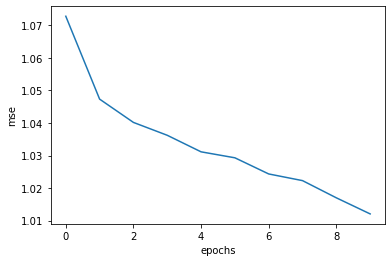

In [46]:
#Paramètres d'apprentissage
batch_size = 100
epochs = 10

#Entraînement
history = NN.fit(xtrainS_p_N, ytrain_p, batch_size, epochs, verbose=1)

#Affichage de l'évolution de la MSE
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mse")
plt.show()

## <font color = 'royalblue'>6 Validation</font>

### 6.1 Sampling

In [52]:
def Create_samples (xtrain, ytrain, seuil=None):
    ##Copy original df
    xtrain_c = xtrain.copy()
    ytrain_c = ytrain.copy()
    
#    #Split between low and high precipitations
#    ytrain_lp = ytrain_c.loc[ytrain_c['Ground_truth'] <= seuil]
#    ytrain_hp = ytrain_c.drop(ytrain_lp.index)
    
#    #Split X validation/train
#    lp_v = ytrain_lp.sample(frac=0.20, axis=0) #20% sample of days with low precip
#    hp_v = ytrain_hp.sample(frac=0.20, axis=0) #20% sample of days with high precip
#    ytrain_v = pd.concat([lp_v, hp_v]) #Concat both low and high precip samples (validation one)
#    ytrain_t = ytrain_c.drop(ytrain_v.index) #Create train sample (80% data)
    
    #Split X validation/train
    xtrain_v = xtrain_c.sample(frac=0.20, axis=0)
    xtrain_t = xtrain_c.drop(xtrain_v.index)
    
    ##Split Y validation/train
    ytrain_v = ytrain_c.loc[ytrain_c['Id'].isin(xtrain_v['Id'])]
    ytrain_t = ytrain_c.drop(ytrain_v.index)
    
#    xtrain_v = xtrain_c.loc[xtrain_c['Id'].isin(ytrain_v['Id'])]
#    xtrain_t = xtrain_c.drop(xtrain_v.index)
    
    #Remove high values of 'Ground_truth'
    ytrain_t = ytrain_t.loc[ytrain_t['Ground_truth'] < 5]
    
    #Keep same rows in xtrain & ytrain
    xtrain_t = xtrain_t.loc[xtrain_t['Id'].isin(ytrain_t["Id"])]
    
    ##Reset index
    xtrain_t.reset_index(drop=True, inplace=True)
    xtrain_v.reset_index(drop=True, inplace=True)
    ytrain_t.reset_index(drop=True, inplace=True)
    ytrain_v.reset_index(drop=True, inplace=True)
    
    ##Sort X
    xtrain_t = xtrain_t.set_index('Id')
    xtrain_t = xtrain_t.reindex(index=ytrain_t['Id'])
    xtrain_t = xtrain_t.reset_index()
    
    xtrain_v = xtrain_v.set_index('Id')
    xtrain_v = xtrain_v.reindex(index=ytrain_v['Id'])
    xtrain_v = xtrain_v.reset_index()
    
    ##Drop useless variables
    xtrain_t.drop(['Id'], axis=1, inplace=True)
    xtrain_v.drop(['Id'], axis=1, inplace=True)
    ytrain_t.drop(['Id'], axis=1, inplace=True)
    ytrain_v.drop(['Id'], axis=1, inplace=True)
    
    return xtrain_t, xtrain_v, ytrain_t, ytrain_v

### 6.2 Monte Carlo validation

In [ ]:
#seuil = 0.5
#seuil = 2
B = 10
MAPE_ = np.zeros(B)

for b in tqdm(range(B)):
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainS_aux, ytrain_aux)
    
    #dummies dataframes for "month" before normalization
    xtrain_t_Dum = pd.get_dummies(xtrain_t['month'])
    xtrain_v_Dum = pd.get_dummies(xtrain_v['month'])
    del xtrain_t_Dum[1]
    del xtrain_v_Dum[1]
    
    #normalization
    xtrain_t_N, xtrain_v_N = normalization(xtrain_t, xtrain_v)
    
    #drop "month" 
    xtrain_t_N.drop(['month'], axis=1, inplace=True)
    xtrain_v_N.drop(['month'], axis=1, inplace=True)
    
    #concatenation after normalization: dummies + original df
    xtrain_t_N = pd.concat([xtrain_t_N, xtrain_t_Dum],axis=1)
    xtrain_v_N = pd.concat([xtrain_v_N, xtrain_v_Dum],axis=1)

    ytrain_v.loc[:,'Ground_truth'] = ytrain_v.loc[:,'Ground_truth'] + 1
    
    nb_variables = np.shape(xtrain_t_N)[1]
    nn = get_model(nb_variables, n_layers, n_neurons)
    
    #Entraînement
    history = nn.fit(xtrain_t_N, ytrain_t, batch_size, epochs, verbose=0)
    
    validation = nn.predict(xtrain_v_N)
    Network_validation = ytrain_v.copy()
    Network_validation['Ground_truth'] = validation
    Network_validation.rename(columns={'Ground_truth':'Prediction'}, inplace=True)

    Network_validation.loc[:,'Prediction'] = Network_validation.loc[:,'Prediction'] + 1
    
    MAPE_[b] = MAPE(Network_validation['Prediction'], ytrain_v['Ground_truth'])

 50%|█████     | 5/10 [01:57<02:00, 24.19s/it]

Mean MAPE : 34.729802649388546


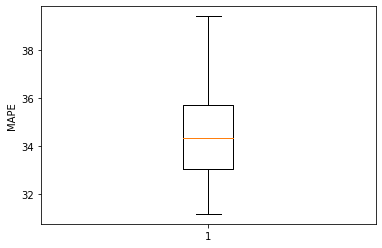

In [49]:
print("Mean MAPE :", np.mean(MAPE_))
plt.boxplot(MAPE_)
plt.ylabel("MAPE")
plt.show()

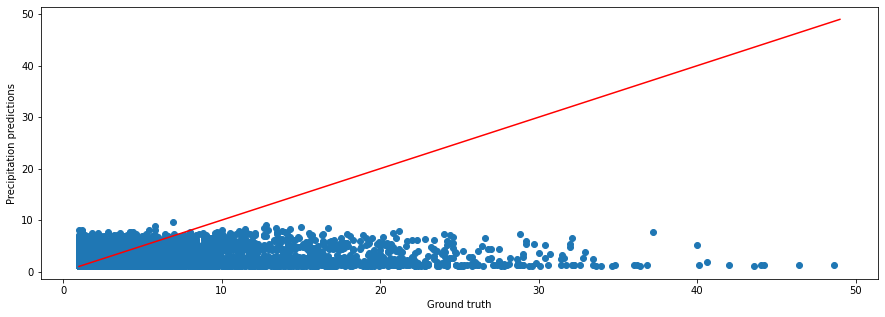

In [50]:
plt.figure(figsize=(15,5))
true_line = np.arange(min(ytrain_v['Ground_truth']),max(ytrain_v['Ground_truth'])+1)
plt.scatter(ytrain_v['Ground_truth'], Network_validation['Prediction'])
plt.plot(true_line, true_line, color='r')
plt.xlabel("Ground truth")
plt.ylabel("Precipitation predictions")
plt.show()

## <font color = 'royalblue'>7 Prediction</font>

In [51]:
predictions_network = NN.predict(xtestS_p_N)
Network_predictions = bl_obsT.copy()
Network_predictions["Prediction"] = predictions_network
display(Network_predictions.head())

ValueError: in user code:

    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 10 but received input with shape (None, 20)


## <font color = 'royalblue'>8 Post-processing</font>

In [59]:
Network_predictions["Prediction"] = Network_predictions["Prediction"] + 1
display(Network_predictions.head())
print('Missing Data :', Network_predictions.isna().sum().sum(), '\n', 'Shape is :', Network_predictions.shape)

,Id,Prediction
0,14066001_149,15.081931
1,14126001_149,3.642311
2,14137001_149,15.374870
3,14216001_149,5.590810
4,14296001_149,2.025035


Missing Data : 0 
 Shape is : (85140, 2)


## <font color = 'royalblue'>9 Exportation</font>

In [60]:
output_file = "Submissions_15_ann-20x32-fail.csv"
Network_predictions.to_csv('/Users/qdouzery/Desktop/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)

#output_file = "Submissions_13_ann-20x32-month-mae.csv"
#Network_predictions.to_csv('C:/Users/Alexia/Desktop/5A/Defi-IA-2022_DGM/Submissions' + output_file, index=False)